# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

# Loading and Merging the Datasets

In [2]:
df_X_train = pd.read_csv('df_inputs_train.csv', index_col=0)
df_y_train = pd.read_csv('df_targets_train.csv', index_col=0) 
df_X_test = pd.read_csv('df_inputs_test.csv', index_col=0)
df_y_test = pd.read_csv('df_targets_test.csv', index_col=0) 

In [3]:
df_prepr_train = pd.concat([df_X_train, df_y_train], axis=1)
df_prepr_test = pd.concat([df_X_test, df_y_test], axis=1)

In [4]:
df_prepr = pd.concat([df_prepr_train, df_prepr_test])

In [5]:
df_prepr_backup = df_prepr.copy()

In [6]:
df_prepr.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,mths_since_last_record:3-14,mths_since_last_record:15-21,mths_since_last_record:22-31,mths_since_last_record:32-50,mths_since_last_record:51-70,mths_since_last_record:71-79,mths_since_last_record:80-84,mths_since_last_record:85-96,mths_since_last_record:>=97,good_bad
58619,9011631,10803033,25000,25000,25000.0,36 months,13.67,850.44,B,B5,...,0,0,0,0,0,0,0,0,0,1
389825,16421396,18503935,7150,7150,7150.0,36 months,10.99,234.05,B,B3,...,0,0,0,0,0,0,0,0,0,1
119082,6094970,7567123,33950,33950,33950.0,36 months,15.22,1180.55,C,C3,...,0,0,0,0,0,0,0,0,0,0
232381,37107753,39870543,16800,16800,16800.0,60 months,11.44,368.97,B,B4,...,0,0,0,0,0,0,0,0,0,1
155122,3733016,4726207,10000,10000,10000.0,36 months,13.11,337.47,B,B4,...,0,0,0,0,0,0,0,0,0,1


In [7]:
df_prepr.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,mths_since_last_record:3-14,mths_since_last_record:15-21,mths_since_last_record:22-31,mths_since_last_record:32-50,mths_since_last_record:51-70,mths_since_last_record:71-79,mths_since_last_record:80-84,mths_since_last_record:85-96,mths_since_last_record:>=97,good_bad
58619,9011631,10803033,25000,25000,25000.0,36 months,13.67,850.44,B,B5,...,0,0,0,0,0,0,0,0,0,1
389825,16421396,18503935,7150,7150,7150.0,36 months,10.99,234.05,B,B3,...,0,0,0,0,0,0,0,0,0,1
119082,6094970,7567123,33950,33950,33950.0,36 months,15.22,1180.55,C,C3,...,0,0,0,0,0,0,0,0,0,0
232381,37107753,39870543,16800,16800,16800.0,60 months,11.44,368.97,B,B4,...,0,0,0,0,0,0,0,0,0,1
155122,3733016,4726207,10000,10000,10000.0,36 months,13.11,337.47,B,B4,...,0,0,0,0,0,0,0,0,0,1


In [8]:
df_prepr.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'mths_since_last_record:3-14', 'mths_since_last_record:15-21',
       'mths_since_last_record:22-31', 'mths_since_last_record:32-50',
       'mths_since_last_record:51-70', 'mths_since_last_record:71-79',
       'mths_since_last_record:80-84', 'mths_since_last_record:85-96',
       'mths_since_last_record:>=97', 'good_bad'],
      dtype='object', length=332)

In [9]:
df_defaults = df_prepr[df_prepr['loan_status'].isin(['Charged Off', 'Does not meet the credit policy. Status:Charged Off'])]
# 'Late (31-120 days)' and 'Default' are not included

In [10]:
df_defaults.shape

(43236, 332)

In [11]:
pd.set_option('display.max_rows', None)

### Finding Missing Values and Filling

In [12]:
df_defaults.isnull().sum()                  

id                                                                     0
member_id                                                              0
loan_amnt                                                              0
funded_amnt                                                            0
funded_amnt_inv                                                        0
term                                                                   0
int_rate                                                               0
installment                                                            0
grade                                                                  0
sub_grade                                                              0
emp_title                                                           3287
emp_length                                                          2337
home_ownership                                                         0
annual_inc                                         

There are two variables with some missing values we are going to use:    <br>
1. mths_since_last_delinq        2. mths_since_last_record

In [13]:
df_defaults['mths_since_last_delinq'].fillna(0, inplace=True)
df_defaults['mths_since_last_record'].fillna(0, inplace=True)

C:\Users\m10sa\anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


# Recovery Rate (RR) and Credit Conversion Factor (CCF)

In [14]:
# RR = recovery rate
df_defaults['RR'] = df_defaults['recoveries'] / df_defaults['funded_amnt']

<ipython-input-14-458995871dfb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_defaults['RR'] = df_defaults['recoveries'] / df_defaults['funded_amnt']


In [15]:
df_defaults['RR'].describe()

count    43236.000000
mean         0.060820
std          0.089770
min          0.000000
25%          0.000000
50%          0.029466
75%          0.114044
max          1.220774
Name: RR, dtype: float64

In [16]:
df_defaults['RR'] = np.where(df_defaults['RR'] > 1, 1, df_defaults['RR'])
df_defaults['RR'] = np.where(df_defaults['RR'] < 0, 0, df_defaults['RR'])

<ipython-input-16-0b00a9143a84>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_defaults['RR'] = np.where(df_defaults['RR'] > 1, 1, df_defaults['RR'])
<ipython-input-16-0b00a9143a84>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_defaults['RR'] = np.where(df_defaults['RR'] < 0, 0, df_defaults['RR'])


In [17]:
df_defaults['RR'].describe()

count    43236.000000
mean         0.060770
std          0.089202
min          0.000000
25%          0.000000
50%          0.029466
75%          0.114044
max          1.000000
Name: RR, dtype: float64

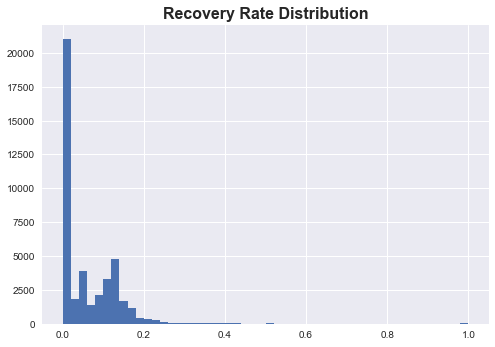

In [18]:
plt.hist(df_defaults['RR'], bins=50)
plt.title('Recovery Rate Distribution', fontdict={'fontweight':'bold', 'fontsize':16})
plt.show()

In [19]:
df_defaults['RR_bool'] = np.where(df_defaults['RR'] == 0, 0, 1)
df_defaults['RR_bool'].head()

<ipython-input-19-563a008617f9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_defaults['RR_bool'] = np.where(df_defaults['RR'] == 0, 0, 1)


119082    1
185068    0
384618    1
323777    0
156356    1
Name: RR_bool, dtype: int32

In [20]:
# CCF = Credit Conversion Factor  (The percentage of the funded amount that the borrowers has not paid at the time of default)
# total_rec_prncp = Total Recovered Principal is the total payments made on the principal of the loan.
df_defaults['CCF'] = (df_defaults['funded_amnt'] - df_defaults['total_rec_prncp']) / df_defaults['funded_amnt']

<ipython-input-20-5fff400468fc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_defaults['CCF'] = (df_defaults['funded_amnt'] - df_defaults['total_rec_prncp']) / df_defaults['funded_amnt']


In [21]:
df_defaults['CCF'].describe()

count    43236.000000
mean         0.735952
std          0.200742
min          0.000438
25%          0.632088
50%          0.789908
75%          0.888543
max          1.000000
Name: CCF, dtype: float64

In [22]:
df_defaults.to_csv('df_defaults.csv')

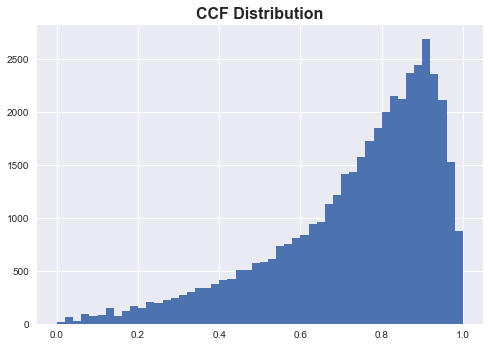

In [23]:
plt.hist(df_defaults['CCF'], bins=50)
plt.title('CCF Distribution', fontdict={'fontweight':'bold', 'fontsize':16})
plt.show()

# LGD Model

### Spiliting data

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train_lgd_stage1, X_test_lgd_stage1, y_train_lgd_stage1, y_test_lgd_stage1 = train_test_split(df_defaults.drop(['good_bad', 'RR', 'RR_bool', 'CCF'], axis=1), df_defaults['RR_bool'], test_size=0.1, random_state=42)
# We drop the dependent variables

In [26]:
# List of all independent variables for the LGD and EAD models.
features_all = ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:MORTGAGE',
'home_ownership:NONE',
'home_ownership:OTHER',
'home_ownership:OWN',
'home_ownership:RENT',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:car',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:educational',
'purpose:home_improvement',
'purpose:house',
'purpose:major_purchase',
'purpose:medical',
'purpose:moving',
'purpose:other',
'purpose:renewable_energy',
'purpose:small_business',
'purpose:vacation',
'purpose:wedding',
'initial_list_status:f',
'initial_list_status:w',
'term_int',
'emp_length_int',
'mths_since_issue_d',
'mths_since_earliest_cr_line',
'funded_amnt',
'int_rate',
'installment',
'annual_inc',
'dti',
'delinq_2yrs',
'inq_last_6mths',
'mths_since_last_delinq',
'mths_since_last_record',
'open_acc',
'pub_rec',
'total_acc',
'acc_now_delinq',
'total_rev_hi_lim']

In [27]:
# List of the reference categories. 
ref_categories = ['grade:G', 'home_ownership:RENT', 'verification_status:Verified',
                  'purpose:credit_card','initial_list_status:f']

### LGD Model Stage 1 - Logistic Regression 

In [28]:
X_train_lgd_stage1 = X_train_lgd_stage1[features_all]

In [29]:
X_train_lgd_stage1 = X_train_lgd_stage1.drop(ref_categories, axis=1)

In [30]:
X_train_lgd_stage1.isnull().sum().sum()

0

### Logistic Regression Model with P-Values

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_curve, roc_auc_score
import scipy.stats as stat

In [32]:
class LogisticRegression_with_p_value:
    
    def __init__(self):                   
        self.model = LogisticRegression(class_weight='balanced', max_iter=100000, multi_class='ovr') 

    def fit(self, X, y):
        self.model.fit(X, y)
        denom = (2 * (1 + np.cosh(self.model.decision_function(X))))
        denom = np.tile(denom, (X.shape[1], 1)).T
        F_ij = np.dot((X / denom).T, X)
        Cramer_Rao = np.linalg.inv(F_ij)
        sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
        z_scores = self.model.coef_[0] / sigma_estimates
        p_value = [stat.norm.sf(abs(x)) * 2 for x in z_scores]
        self.coef_ = self.model.coef_
        self.intercept_ = self.model.intercept_
        self.p_value = p_value       

In [33]:
clf_log_lgd_st1 = LogisticRegression_with_p_value()
clf_log_lgd_st1.fit(X_train_lgd_stage1, y_train_lgd_stage1)

In [34]:
y_pred_train_lgd_stage1 = clf_log_lgd_st1.model.predict(X_train_lgd_stage1)
y_pred_train_lgd_stage1

array([0, 1, 1, ..., 0, 0, 0])

In [35]:
clf_log_lgd_st1.intercept_

array([-0.00049173])

In [36]:
clf_log_lgd_st1.coef_

array([[-6.41280892e-05, -2.83928255e-04, -4.37536611e-04,
        -4.94697583e-05,  7.10321386e-05,  2.38734163e-04,
        -1.25776575e-04,  3.14425792e-06,  2.99510793e-06,
        -6.85729986e-06, -3.44301092e-04, -6.35941628e-04,
         3.61688602e-05, -5.53375371e-04,  4.59074007e-06,
         4.37334477e-05,  2.81445888e-05,  4.07317024e-05,
        -2.41653999e-06,  7.19796405e-06,  1.03302821e-04,
         8.22671635e-06,  1.55828134e-04,  3.91080477e-06,
         3.77593033e-05, -2.51548710e-03, -1.26793580e-02,
        -1.86314560e-03,  1.37444426e-02, -1.46857328e-03,
         6.45511014e-05, -1.92432371e-03, -1.52564914e-03,
         5.97460663e-07, -1.82220670e-02, -1.89524720e-04,
         4.30555495e-04, -4.29328401e-04, -3.98735511e-03,
        -6.15371241e-03, -1.10028141e-04, -1.32908529e-02,
         5.95362520e-06, -2.94685937e-06]])

In [37]:
clf_log_lgd_st1.coef_.shape

(1, 44)

In [38]:
accuracy_score(y_true=y_train_lgd_stage1, y_pred=y_pred_train_lgd_stage1)

0.5918739720394737

In [39]:
f1_score(y_true=y_train_lgd_stage1, y_pred=y_pred_train_lgd_stage1, average=None, labels=[0,1])

array([0.54520462, 0.62985666])

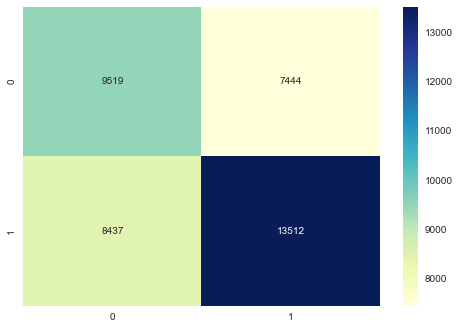

In [40]:
labels = [0,1]
cm = confusion_matrix(y_true=y_train_lgd_stage1, y_pred=y_pred_train_lgd_stage1, labels=labels)
df_cm = pd.DataFrame(cm, index=labels, columns=labels)
sns.heatmap(df_cm, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

In [41]:
features = X_train_lgd_stage1.columns
features

Index(['grade:A', 'grade:B', 'grade:C', 'grade:D', 'grade:E', 'grade:F',
       'home_ownership:MORTGAGE', 'home_ownership:NONE',
       'home_ownership:OTHER', 'home_ownership:OWN',
       'verification_status:Not Verified',
       'verification_status:Source Verified', 'purpose:car',
       'purpose:debt_consolidation', 'purpose:educational',
       'purpose:home_improvement', 'purpose:house', 'purpose:major_purchase',
       'purpose:medical', 'purpose:moving', 'purpose:other',
       'purpose:renewable_energy', 'purpose:small_business',
       'purpose:vacation', 'purpose:wedding', 'initial_list_status:w',
       'term_int', 'emp_length_int', 'mths_since_issue_d',
       'mths_since_earliest_cr_line', 'funded_amnt', 'int_rate', 'installment',
       'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'total_acc', 'acc_now_delinq', 'total_rev_hi_lim'],
      dtype='object')

In [42]:
d = {'Feature Name':features, 'Coefficient':clf_log_lgd_st1.coef_.reshape(clf_log_lgd_st1.coef_.shape[1],)}
summary_table = pd.DataFrame(data=d)
new_row = pd.DataFrame({'Feature Name':'intercept', 'Coefficient':clf_log_lgd_st1.intercept_[0]}, index=[0])
summary_table = pd.concat([new_row, summary_table], axis=0).reset_index(drop=True) 

p_value = clf_log_lgd_st1.p_value
p_value = np.append(np.nan, np.array(p_value))  
summary_table['p_value'] = p_value                    
summary_table

,Feature Name,Coefficient,p_value
0,intercept,-4.917291e-04,NaN
1,grade:A,-6.412809e-05,9.994206e-01
2,grade:B,-2.839283e-04,9.968612e-01
3,grade:C,-4.375366e-04,9.948499e-01
4,grade:D,-4.946976e-05,9.994227e-01
5,grade:E,7.103214e-05,9.992250e-01
6,grade:F,2.387342e-04,9.976914e-01
7,home_ownership:MORTGAGE,-1.257766e-04,9.957648e-01
8,home_ownership:NONE,3.144258e-06,9.999965e-01
9,home_ownership:OTHER,2.995108e-06,9.999935e-01


### Testing the Model

In [43]:
X_test_lgd_stage1 = X_test_lgd_stage1[features_all]

In [44]:
X_test_lgd_stage1 = X_test_lgd_stage1.drop(ref_categories, axis=1)

In [45]:
y_pred_test_lgd_stage1 = clf_log_lgd_st1.model.predict(X_test_lgd_stage1)
y_pred_test_lgd_stage1

array([1, 1, 0, ..., 0, 0, 1])

In [46]:
y_pred_test_proba_lgd_stage1 = clf_log_lgd_st1.model.predict_proba(X_test_lgd_stage1)
y_pred_test_proba_lgd_stage1

array([[0.4312093 , 0.5687907 ],
       [0.34262933, 0.65737067],
       [0.57694764, 0.42305236],
       ...,
       [0.5854811 , 0.4145189 ],
       [0.54342077, 0.45657923],
       [0.29489343, 0.70510657]])

In [47]:
y_pred_test_proba_lgd_stage1 = y_pred_test_proba_lgd_stage1[:, 1]

In [48]:
y_pred_test_proba_lgd_stage1

array([0.5687907 , 0.65737067, 0.42305236, ..., 0.4145189 , 0.45657923,
       0.70510657])

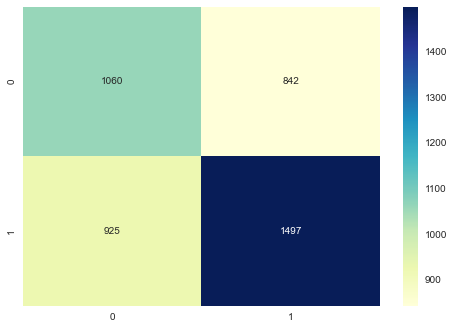

In [49]:
labels = [0,1]
cm = confusion_matrix(y_true=y_test_lgd_stage1, y_pred=y_pred_test_lgd_stage1, labels=labels)
df_cm = pd.DataFrame(cm, index=labels, columns=labels)
sns.heatmap(df_cm, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

In this lecture we assess the accuracy of the 1st stage of the LGD model.

In [50]:
y_test_lgd_stage1_temp = y_test_lgd_stage1
y_test_lgd_stage1_temp.head(10)

34618     1
29482     1
116177    0
106338    1
444443    0
401821    0
82842     1
8436      0
447704    0
24073     1
Name: RR_bool, dtype: int32

In [51]:
y_test_lgd_stage1_temp.reset_index(drop=True, inplace=True)

In [52]:
df_true_pred_probs = pd.concat([y_test_lgd_stage1_temp, pd.DataFrame(y_pred_test_proba_lgd_stage1), pd.DataFrame(y_pred_test_lgd_stage1)], axis=1)
df_true_pred_probs.columns = ['y_test_lgd_stage1', 'y_pred_test_proba_lgd_stage1', 'y_pred_test_lgd_stage1']
df_true_pred_probs.head()

,y_test_lgd_stage1,y_pred_test_proba_lgd_stage1,y_pred_test_lgd_stage1
0,1,0.568791,1
1,1,0.657371,1
2,0,0.423052,0
3,1,0.531144,1
4,0,0.554148,1


In [53]:
df_true_pred_probs.index = X_test_lgd_stage1.index

In [54]:
df_true_pred_probs.head()

,y_test_lgd_stage1,y_pred_test_proba_lgd_stage1,y_pred_test_lgd_stage1
34618,1,0.568791,1
29482,1,0.657371,1
116177,0,0.423052,0
106338,1,0.531144,1
444443,0,0.554148,1


### Measuring the Accuracy of the Model

In [55]:
accuracy_score(y_true=y_test_lgd_stage1, y_pred=y_pred_test_lgd_stage1)

0.5913506012950971

In [56]:
f1_score(y_true=y_test_lgd_stage1, y_pred=y_pred_test_lgd_stage1, average=None, labels=[0,1])

array([0.54540777, 0.62885948])

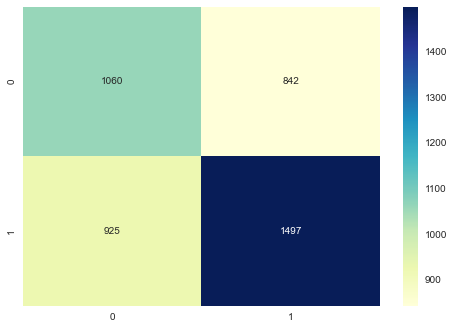

In [57]:
labels = [0,1]
cm = confusion_matrix(y_true=y_test_lgd_stage1, y_pred=y_pred_test_lgd_stage1, labels=labels)
df_cm = pd.DataFrame(cm, index=labels, columns=labels)
sns.heatmap(df_cm, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

### Saving the Model

In [58]:
import pickle 
with open('lgd_model_stage1.sav', 'wb') as f:
    pickle.dump('clf_log_lgd_st1', f)

### LGD Model Stage 2 - Multiple Linear Regression 

In [59]:
df_lgd_stage2 = df_defaults[df_defaults['RR_bool'] == 1]

In [60]:
X_train_lgd_stage2, X_test_lgd_stage2, y_train_lgd_stage2, y_test_lgd_stage2 = train_test_split(df_lgd_stage2.drop(['good_bad', 'RR', 'RR_bool', 'CCF'], axis=1), df_lgd_stage2['RR'], test_size=0.1, random_state=42)
# We drop the dependent variables 

In [61]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [62]:
class LinearRegression(linear_model.LinearRegression):
    def __init__(self, fit_intercept=True, normalize=False, copy_X=True, n_jobs=1):
        super().__init__(fit_intercept=fit_intercept, normalize=normalize, copy_X=copy_X, n_jobs=n_jobs)
        self.fit_intercept = fit_intercept
        self.normalize = normalize
        self.copy_X = copy_X
        self.n_jobs = n_jobs
    def fit(self, X, y, n_jobs=1):
        self = super(LinearRegression, self).fit(X, y, n_jobs)
        sse = np.sum((self.predict(X) - y) ** 2, axis=0) / float(X.shape[0] - X.shape[1])
        se = np.array([np.sqrt(np.diagonal(sse * np.linalg.inv(np.dot(X.T, X))))])
        self.t = self.coef_ / se
        self.p = np.squeeze(2 * (1 - stat.t.cdf(np.abs(self.t), y.shape[0] - X.shape[1])))
        return self

In [63]:
X_train_lgd_stage2 = X_train_lgd_stage2[features_all]

In [64]:
X_train_lgd_stage2 = X_train_lgd_stage2.drop(ref_categories, axis=1)

In [65]:
lm_lgd_st2 = LinearRegression()
lm_lgd_st2.fit(X_train_lgd_stage2, y_train_lgd_stage2)

LinearRegression()

In [66]:
features = X_train_lgd_stage2.columns
features

Index(['grade:A', 'grade:B', 'grade:C', 'grade:D', 'grade:E', 'grade:F',
       'home_ownership:MORTGAGE', 'home_ownership:NONE',
       'home_ownership:OTHER', 'home_ownership:OWN',
       'verification_status:Not Verified',
       'verification_status:Source Verified', 'purpose:car',
       'purpose:debt_consolidation', 'purpose:educational',
       'purpose:home_improvement', 'purpose:house', 'purpose:major_purchase',
       'purpose:medical', 'purpose:moving', 'purpose:other',
       'purpose:renewable_energy', 'purpose:small_business',
       'purpose:vacation', 'purpose:wedding', 'initial_list_status:w',
       'term_int', 'emp_length_int', 'mths_since_issue_d',
       'mths_since_earliest_cr_line', 'funded_amnt', 'int_rate', 'installment',
       'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'total_acc', 'acc_now_delinq', 'total_rev_hi_lim'],
      dtype='object')

In [67]:
lm_lgd_st2.intercept_

0.35727753311355664

In [68]:
lm_lgd_st2.coef_

array([-7.56746895e-02, -5.85357349e-02, -4.39655221e-02, -3.29608990e-02,
       -1.78829003e-02, -6.21527020e-03,  3.19751295e-03,  1.17663391e-01,
        4.48335826e-02,  6.10811341e-03,  1.51125701e-03, -2.52394329e-03,
       -2.48096572e-03,  6.05582182e-04,  5.90505250e-02, -1.80766572e-03,
       -1.89184534e-03,  2.01555882e-03,  1.28562091e-02,  1.64158047e-02,
        4.51852688e-03,  3.69144630e-03,  1.58647728e-03,  5.30157344e-03,
        1.96869156e-02,  1.33807616e-02,  1.54334492e-04,  2.36967416e-04,
       -1.57278577e-03,  2.06891241e-05,  5.26078398e-07, -2.72439088e-03,
       -3.52642313e-05,  6.32722913e-08,  1.02354502e-04,  1.61603146e-03,
        9.45987198e-04, -4.61416184e-06, -4.69652744e-05, -1.07560207e-03,
        3.52610985e-03,  4.58410848e-04, -1.93320268e-03,  2.53672098e-07])

In [69]:
lm_lgd_st2.coef_.shape

(44,)

In [70]:
d = {'Feature Name':features, 'Coefficient':lm_lgd_st2.coef_} 
summary_table = pd.DataFrame(data=d)
new_row = pd.DataFrame({'Feature Name':'intercept', 'Coefficient':lm_lgd_st2.intercept_}, index=[0])
summary_table = pd.concat([new_row, summary_table], axis=0).reset_index(drop=True) 

p_values = lm_lgd_st2.p
p_values = np.append(np.nan, np.array(p_values))  
summary_table['p_value'] = p_values.round(3)                   
summary_table

,Feature Name,Coefficient,p_value
0,intercept,3.572775e-01,NaN
1,grade:A,-7.567469e-02,0.000
2,grade:B,-5.853573e-02,0.000
3,grade:C,-4.396552e-02,0.000
4,grade:D,-3.296090e-02,0.000
5,grade:E,-1.788290e-02,0.000
6,grade:F,-6.215270e-03,0.174
7,home_ownership:MORTGAGE,3.197513e-03,0.024
8,home_ownership:NONE,1.176634e-01,0.001
9,home_ownership:OTHER,4.483358e-02,0.018


In [71]:
X_test_lgd_stage2 = X_test_lgd_stage2[features_all]
X_test_lgd_stage2 = X_test_lgd_stage2.drop(ref_categories, axis=1)

In [72]:
X_test_lgd_stage2.columns

Index(['grade:A', 'grade:B', 'grade:C', 'grade:D', 'grade:E', 'grade:F',
       'home_ownership:MORTGAGE', 'home_ownership:NONE',
       'home_ownership:OTHER', 'home_ownership:OWN',
       'verification_status:Not Verified',
       'verification_status:Source Verified', 'purpose:car',
       'purpose:debt_consolidation', 'purpose:educational',
       'purpose:home_improvement', 'purpose:house', 'purpose:major_purchase',
       'purpose:medical', 'purpose:moving', 'purpose:other',
       'purpose:renewable_energy', 'purpose:small_business',
       'purpose:vacation', 'purpose:wedding', 'initial_list_status:w',
       'term_int', 'emp_length_int', 'mths_since_issue_d',
       'mths_since_earliest_cr_line', 'funded_amnt', 'int_rate', 'installment',
       'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'total_acc', 'acc_now_delinq', 'total_rev_hi_lim'],
      dtype='object')

In [73]:
y_pred_test_lgd_stage2 = lm_lgd_st2.predict(X_test_lgd_stage2)

In [74]:
y_test_lgd_stage2_temp = y_test_lgd_stage2
y_test_lgd_stage2_temp = y_test_lgd_stage2_temp.reset_index(drop=True)

C:\Users\m10sa\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


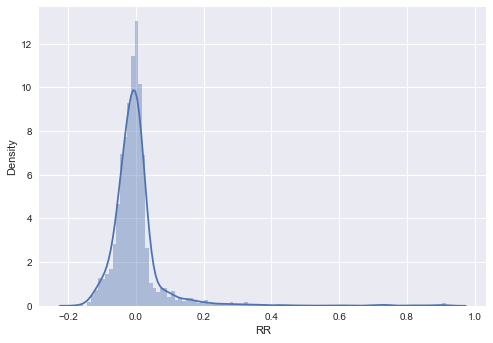

In [75]:
sns.distplot(y_test_lgd_stage2 - y_pred_test_lgd_stage2, bins=100)
plt.show()

### Saving the Model

In [76]:
with open('lgd_model_stage2.sav', 'wb') as f:
    pickle.dump(lm_lgd_st2, f)

### LGD Model - Combining Stages 1 and  2

In [77]:
# inputs = X_test_lgd_stage1    ***
y_pred_test_lgd_stage2_all = lm_lgd_st2.predict(X_test_lgd_stage1)
y_pred_test_lgd_stage2_all

array([0.04548586, 0.06251815, 0.11880874, ..., 0.13418521, 0.09390662,
       0.07926178])

In [78]:
y_pred_test_lgd = y_pred_test_lgd_stage1 * y_pred_test_lgd_stage2_all           # RR

In [79]:
pd.DataFrame(y_pred_test_lgd).describe()   

,0
count,4324.000000
mean,0.054345
std,0.054455
min,-0.008721
25%,0.000000
50%,0.058020
75%,0.104467
max,0.171331


In [80]:
y_pred_test_lgd = np.where(y_pred_test_lgd < 0, 0, y_pred_test_lgd)     
y_pred_test_lgd = np.where(y_pred_test_lgd > 1, 1, y_pred_test_lgd)
y_pred_test_lgd

array([0.04548586, 0.06251815, 0.        , ..., 0.        , 0.        ,
       0.07926178])

In [81]:
pd.DataFrame(y_pred_test_lgd).describe()

,0
count,4324.000000
mean,0.054348
std,0.054451
min,0.000000
25%,0.000000
50%,0.058020
75%,0.104467
max,0.171331


# EAD Model

In [82]:
X_train_ead, X_test_ead, y_train_ead, y_test_ead = train_test_split(df_defaults.drop(['good_bad', 'RR', 'RR_bool', 'CCF'], axis=1), df_defaults['CCF'], test_size=0.1, random_state=42)

In [83]:
X_train_ead.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'mths_since_last_record:0-2', 'mths_since_last_record:3-14',
       'mths_since_last_record:15-21', 'mths_since_last_record:22-31',
       'mths_since_last_record:32-50', 'mths_since_last_record:51-70',
       'mths_since_last_record:71-79', 'mths_since_last_record:80-84',
       'mths_since_last_record:85-96', 'mths_since_last_record:>=97'],
      dtype='object', length=331)

In [84]:
X_train_ead = X_train_ead[features_all]
X_train_ead = X_train_ead.drop(ref_categories, axis=1)

In [85]:
lm_ead = LinearRegression()
lm_ead.fit(X_train_ead, y_train_ead)

LinearRegression()

In [86]:
lm_ead.intercept_

1.384850983112182

In [87]:
lm_ead.coef_

array([-3.06442687e-01, -2.38261518e-01, -1.72377425e-01, -1.20324714e-01,
       -6.84180978e-02, -1.93000312e-02, -6.56407339e-03,  1.71882505e-02,
       -1.83575310e-02, -3.43964798e-03, -9.27426937e-04,  9.06640068e-03,
       -4.49119530e-03,  1.28335216e-02,  1.03306509e-01,  2.06729635e-02,
        1.06392758e-02,  3.31521402e-02,  4.09782239e-02,  4.64315576e-02,
        3.84845389e-02,  4.73983038e-02,  5.62540097e-02,  2.12625735e-02,
        3.56863416e-02,  1.26756845e-02,  4.44428130e-03, -1.57386864e-03,
       -4.34985920e-03, -3.56640479e-05,  2.69879998e-06, -1.17070710e-02,
       -7.96495766e-05,  8.77041697e-09,  3.39975069e-04,  2.72289788e-05,
        1.08343891e-02, -1.99564880e-04, -5.27798607e-05, -2.21009890e-03,
        5.70258145e-03,  5.09707595e-04,  1.14331969e-02,  7.23041601e-08])

In [88]:
features = X_train_ead.columns

In [89]:
d = {'Feature Name':features, 'Coefficient':lm_ead.coef_} 
summary_table = pd.DataFrame(data=d)
new_row = pd.DataFrame({'Feature Name':'intercept', 'Coefficient':lm_ead.intercept_}, index=[0])
summary_table = pd.concat([new_row, summary_table], axis=0).reset_index(drop=True) 

p_values = lm_ead.p
p_values = np.append(np.nan, np.array(p_values))  
summary_table['p_value'] = p_values.round(3)                   
summary_table

,Feature Name,Coefficient,p_value
0,intercept,1.384851e+00,NaN
1,grade:A,-3.064427e-01,0.000
2,grade:B,-2.382615e-01,0.000
3,grade:C,-1.723774e-01,0.000
4,grade:D,-1.203247e-01,0.000
5,grade:E,-6.841810e-02,0.000
6,grade:F,-1.930003e-02,0.005
7,home_ownership:MORTGAGE,-6.564073e-03,0.001
8,home_ownership:NONE,1.718825e-02,0.777
9,home_ownership:OTHER,-1.835753e-02,0.534


### Testing the Model 

In [90]:
X_test_ead = X_test_ead[features_all]
X_test_ead = X_test_ead.drop(ref_categories, axis=1)

In [91]:
y_pred_test_ead = lm_ead.predict(X_test_ead)    

Wwe can look at the distribution of the residuals.

C:\Users\m10sa\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


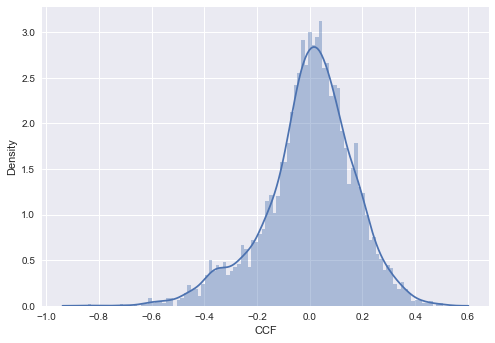

In [92]:
sns.distplot(y_test_ead - y_pred_test_ead, bins=100)
plt.show()

In [93]:
pd.DataFrame(y_pred_test_ead).describe()

,0
count,4324.000000
mean,0.737138
std,0.105220
min,0.371703
25%,0.661795
50%,0.733794
75%,0.813188
max,0.999689


In [94]:
y_pred_test_ead = np.where(y_pred_test_ead < 0, 0, y_pred_test_ead) 
y_pred_test_ead = np.where(y_pred_test_ead > 1, 1, y_pred_test_ead)

In [95]:
pd.DataFrame(y_pred_test_ead).describe()

,0
count,4324.000000
mean,0.737138
std,0.105220
min,0.371703
25%,0.661795
50%,0.733794
75%,0.813188
max,0.999689


# Calculating Expected Loss

__EL = PD * LGD * EAD = PD * (1 - RR) * (CCF * FA)__

In [96]:
df_prepr.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,mths_since_last_record:3-14,mths_since_last_record:15-21,mths_since_last_record:22-31,mths_since_last_record:32-50,mths_since_last_record:51-70,mths_since_last_record:71-79,mths_since_last_record:80-84,mths_since_last_record:85-96,mths_since_last_record:>=97,good_bad
58619,9011631,10803033,25000,25000,25000.0,36 months,13.67,850.44,B,B5,...,0,0,0,0,0,0,0,0,0,1
389825,16421396,18503935,7150,7150,7150.0,36 months,10.99,234.05,B,B3,...,0,0,0,0,0,0,0,0,0,1
119082,6094970,7567123,33950,33950,33950.0,36 months,15.22,1180.55,C,C3,...,0,0,0,0,0,0,0,0,0,0
232381,37107753,39870543,16800,16800,16800.0,60 months,11.44,368.97,B,B4,...,0,0,0,0,0,0,0,0,0,1
155122,3733016,4726207,10000,10000,10000.0,36 months,13.11,337.47,B,B4,...,0,0,0,0,0,0,0,0,0,1


In [97]:
df_prepr.isnull().sum()

id                                                                      0
member_id                                                               0
loan_amnt                                                               0
funded_amnt                                                             0
funded_amnt_inv                                                         0
term                                                                    0
int_rate                                                                0
installment                                                             0
grade                                                                   0
sub_grade                                                               0
emp_title                                                           27588
emp_length                                                          21008
home_ownership                                                          0
annual_inc                            

In [98]:
df_prepr['mths_since_last_delinq'].fillna(0, inplace=True)
df_prepr['mths_since_last_record'].fillna(0, inplace=True)

In [99]:
df_prepr_lgd_ead = df_prepr[features_all]
df_prepr_lgd_ead = df_prepr_lgd_ead.drop(ref_categories, axis=1)

In [100]:
# LGD = 1 - recovery rate 
df_prepr['RR_st1'] = clf_log_lgd_st1.model.predict(df_prepr_lgd_ead)
df_prepr['RR_st2'] = lm_lgd_st2.predict(df_prepr_lgd_ead)
df_prepr['RR'] = df_prepr['RR_st1'] * df_prepr['RR_st2']

df_prepr['RR'] = np.where(df_prepr['RR'] < 0, 0, df_prepr['RR'])
df_prepr['RR'] = np.where(df_prepr['RR'] > 1, 1, df_prepr['RR'])

In [101]:
df_prepr['LGD'] = 1 - df_prepr['RR']

In [102]:
df_prepr['LGD'].describe()

count    466285.000000
mean          0.947893
std           0.058094
min           0.338421
25%           0.890005
50%           1.000000
75%           1.000000
max           1.000000
Name: LGD, dtype: float64

In [103]:
# EAD = CCF * funded amount
df_prepr['CCF'] = lm_ead.predict(df_prepr_lgd_ead)
df_prepr['CCF'] = np.where(df_prepr['CCF'] < 0, 0, df_prepr['CCF'])
df_prepr['CCF'] = np.where(df_prepr['CCF'] > 1, 1, df_prepr['CCF'])

In [104]:
df_prepr['EAD'] = df_prepr['CCF'] * df_prepr['funded_amnt']

In [105]:
df_prepr['EAD'].describe()

count    466285.000000
mean      10800.141073
std        6931.590316
min         188.275106
25%        5485.204226
50%        9194.410824
75%       14668.732685
max       35000.000000
Name: EAD, dtype: float64

In [106]:
df_prepr.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,mths_since_last_record:80-84,mths_since_last_record:85-96,mths_since_last_record:>=97,good_bad,RR_st1,RR_st2,RR,LGD,CCF,EAD
58619,9011631,10803033,25000,25000,25000.0,36 months,13.67,850.44,B,B5,...,0,0,0,1,1,0.111395,0.111395,0.888605,0.666552,16663.794158
389825,16421396,18503935,7150,7150,7150.0,36 months,10.99,234.05,B,B3,...,0,0,0,1,0,0.129192,0.000000,1.000000,0.728631,5209.709108
119082,6094970,7567123,33950,33950,33950.0,36 months,15.22,1180.55,C,C3,...,0,0,0,0,0,0.096859,0.000000,1.000000,0.649972,22066.542649
232381,37107753,39870543,16800,16800,16800.0,60 months,11.44,368.97,B,B4,...,0,0,0,1,0,0.136116,0.000000,1.000000,0.833909,14009.672847
155122,3733016,4726207,10000,10000,10000.0,36 months,13.11,337.47,B,B4,...,0,0,0,1,1,0.106962,0.106962,0.893038,0.648900,6488.998967


In [107]:
df_X_pd = df_prepr

In [108]:
df_X_pd.shape

(466285, 338)

In [109]:
df_X_pd.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,mths_since_last_record:80-84,mths_since_last_record:85-96,mths_since_last_record:>=97,good_bad,RR_st1,RR_st2,RR,LGD,CCF,EAD
58619,9011631,10803033,25000,25000,25000.0,36 months,13.67,850.44,B,B5,...,0,0,0,1,1,0.111395,0.111395,0.888605,0.666552,16663.794158
389825,16421396,18503935,7150,7150,7150.0,36 months,10.99,234.05,B,B3,...,0,0,0,1,0,0.129192,0.000000,1.000000,0.728631,5209.709108
119082,6094970,7567123,33950,33950,33950.0,36 months,15.22,1180.55,C,C3,...,0,0,0,0,0,0.096859,0.000000,1.000000,0.649972,22066.542649
232381,37107753,39870543,16800,16800,16800.0,60 months,11.44,368.97,B,B4,...,0,0,0,1,0,0.136116,0.000000,1.000000,0.833909,14009.672847
155122,3733016,4726207,10000,10000,10000.0,36 months,13.11,337.47,B,B4,...,0,0,0,1,1,0.106962,0.106962,0.893038,0.648900,6488.998967


In [110]:
features_all_pd = ['addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',   
'grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:OTHER_NONE_RENT_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',                                            
'purpose:sm_b__edu__mov__ren_en__house__oth',
'purpose:med__wed__vacation',
'purpose:debt_consolidation',                                            
'purpose:home_impr__major_purch__car',
'purpose:credit_card',                                             
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',                                            
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',                                                                   
'mths_since_issue_d:<104',
'mths_since_issue_d:104-105',
'mths_since_issue_d:105-110',
'mths_since_issue_d:110-114',
'mths_since_issue_d:114-125',
'mths_since_issue_d:125-134',
'mths_since_issue_d:134-153',
'mths_since_issue_d:153-170',                                             
'mths_since_issue_d:170-186',
'mths_since_issue_d:>=186',                                            
'int_rate:<=9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-21.106',
'int_rate:>21.106',                                            
'mths_since_earliest_cr_line:<304',                       
'mths_since_earliest_cr_line:304-418',
'mths_since_earliest_cr_line:418-493',
'mths_since_earliest_cr_line:493-512',
'mths_since_earliest_cr_line:512-607',
'mths_since_earliest_cr_line:607-664',
'mths_since_earliest_cr_line:>=664',                                             
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',           
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-150K',
'annual_inc:>150K',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-22',
'mths_since_last_delinq:23-37',
'mths_since_last_delinq:38-56',
'mths_since_last_delinq:57-60',
'mths_since_last_delinq:61-82',
'mths_since_last_delinq:>=83',                                                                                         
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-8.4',
'dti:8.4-10.5',                                             
'dti:10.5-15.4',
'dti:15.4-18.2',
'dti:18.2-21.7',
'dti:21.7-26.6',
'dti:26.6-35',
'dti:>35']

In [111]:
ref_categories_pd = ['grade:G',
'addr_state:ND_NE_IA_NV_FL_HI_AL',       
'home_ownership:OTHER_NONE_RENT_ANY',
'verification_status:Verified',
'purpose:sm_b__edu__mov__ren_en__house__oth',
'initial_list_status:f',
'term:60',
'emp_length:0',
'mths_since_issue_d:>=186',                  
'int_rate:>21.106',
'mths_since_earliest_cr_line:>=664',           
'inq_last_6mths:>6',
'acc_now_delinq:0',
'annual_inc:<20K',
'mths_since_last_delinq:0-3',                       
'dti:>35']

In [112]:
df_X_pd = df_X_pd[features_all_pd]
df_X_pd = df_X_pd.drop(ref_categories_pd, axis=1)
df_X_pd.shape

(466285, 84)

In [113]:
import pickle
with open('pd_model.sav', 'rb') as f:
    clf_log_pd = pickle.load(f)

In [114]:
df_prepr['PD'] = clf_log_pd.model.predict_proba(df_X_pd)[:, 0] 
df_prepr['PD'].head()
# The first column shows the probability of 0 (probability of default)

58619     0.273640
389825    0.392125
119082    0.504713
232381    0.254786
155122    0.431130
Name: PD, dtype: float64

In [115]:
df_prepr['PD'].describe()

count    466285.000000
mean          0.453448
std           0.172112
min           0.061065
25%           0.324153
50%           0.455171
75%           0.583523
max           0.955768
Name: PD, dtype: float64

In [116]:
df_prepr.shape

(466285, 339)

In [117]:
df_prepr.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,mths_since_last_record:85-96,mths_since_last_record:>=97,good_bad,RR_st1,RR_st2,RR,LGD,CCF,EAD,PD
58619,9011631,10803033,25000,25000,25000.0,36 months,13.67,850.44,B,B5,...,0,0,1,1,0.111395,0.111395,0.888605,0.666552,16663.794158,0.273640
389825,16421396,18503935,7150,7150,7150.0,36 months,10.99,234.05,B,B3,...,0,0,1,0,0.129192,0.000000,1.000000,0.728631,5209.709108,0.392125
119082,6094970,7567123,33950,33950,33950.0,36 months,15.22,1180.55,C,C3,...,0,0,0,0,0.096859,0.000000,1.000000,0.649972,22066.542649,0.504713
232381,37107753,39870543,16800,16800,16800.0,60 months,11.44,368.97,B,B4,...,0,0,1,0,0.136116,0.000000,1.000000,0.833909,14009.672847,0.254786
155122,3733016,4726207,10000,10000,10000.0,36 months,13.11,337.47,B,B4,...,0,0,1,1,0.106962,0.106962,0.893038,0.648900,6488.998967,0.431130


In [118]:
df_prepr.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,mths_since_last_record:85-96,mths_since_last_record:>=97,good_bad,RR_st1,RR_st2,RR,LGD,CCF,EAD,PD
396139,15570338,17662755,10000,10000,10000.0,60 months,14.64,236.02,C,C3,...,0,0,1,0,0.158822,0.000000,1.000000,0.837576,8375.760766,0.262137
154598,3704168,4847642,6375,6375,6325.0,36 months,14.33,218.91,C,C1,...,0,0,1,0,0.117729,0.000000,1.000000,0.677179,4317.017992,0.631063
455547,10557189,12439182,12000,12000,11950.0,36 months,11.99,398.52,B,B3,...,0,0,1,0,0.113886,0.000000,1.000000,0.672454,8069.452280,0.310084
337453,22272920,24595732,3200,3200,3200.0,36 months,10.15,103.49,B,B2,...,0,0,1,0,0.153909,0.000000,1.000000,0.726730,2325.535928,0.265046
281174,30966304,33529488,10000,10000,10000.0,36 months,7.69,311.94,A,A4,...,0,0,1,1,0.112405,0.112405,0.887595,0.710530,7105.298449,0.201837


In [119]:
# Expected Loss
df_prepr['EL'] = df_prepr['PD'] * df_prepr['LGD'] * df_prepr['EAD']

In [120]:
df_prepr['EL'].describe()

count    466285.000000
mean       4618.879227
std        3681.608057
min          61.832626
25%        1935.726709
50%        3464.359776
75%        6274.747809
max       26476.237827
Name: EL, dtype: float64

In [121]:
df_prepr[['funded_amnt', 'PD', 'LGD', 'EAD', 'EL']].head()

,funded_amnt,PD,LGD,EAD,EL
58619,25000,0.273640,0.888605,16663.794158,4051.938034
389825,7150,0.392125,1.000000,5209.709108,2042.859664
119082,33950,0.504713,1.000000,22066.542649,11137.263807
232381,16800,0.254786,1.000000,14009.672847,3569.470079
155122,10000,0.431130,0.893038,6488.998967,2498.365933


In [123]:
df_prepr['EL'].sum()

2153714100.1397166